In [8]:
!pip install opencv-python scikit-learn matplotlib joblib


In [9]:
import os
import cv2
import numpy as np

# Create sample folders for 3 food categories
!mkdir -p /content/FoodSample/apple_pie /content/FoodSample/burger /content/FoodSample/pizza

IMG_SIZE = 64  # resize images

# Generate random images for demo (50 images per category)
for i in range(50):
    for food in ['apple_pie', 'burger', 'pizza']:
        img = np.random.randint(0,256,(IMG_SIZE,IMG_SIZE,3),dtype=np.uint8)
        cv2.imwrite(f'/content/FoodSample/{food}/{food}_{i}.jpg', img)


In [10]:
data = []
labels = []
categories = os.listdir('/content/FoodSample')

for idx, category in enumerate(categories):
    folder = os.path.join('/content/FoodSample', category)
    for file in os.listdir(folder):
        try:
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.flatten()
            data.append(img)
            labels.append(idx)
        except:
            pass

X = np.array(data)
y = np.array(labels)

print("✅ Images loaded:", X.shape)
print("✅ Labels loaded:", y.shape)


✅ Images loaded: (150, 12288)
✅ Labels loaded: (150,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data split and scaled")


✅ Data split and scaled


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

print("Training SVM model...")
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("✅ Model trained!")
print(f"📊 Accuracy: {acc*100:.2f}%")
print(classification_report(y_test, y_pred))


Training SVM model...
✅ Model trained!
📊 Accuracy: 30.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
food_calories = {'apple_pie': 300, 'burger': 500, 'pizza': 400}


Saving download (3).jpg to download (3) (1).jpg
Predicted Food: apple_pie
Estimated Calories: 300


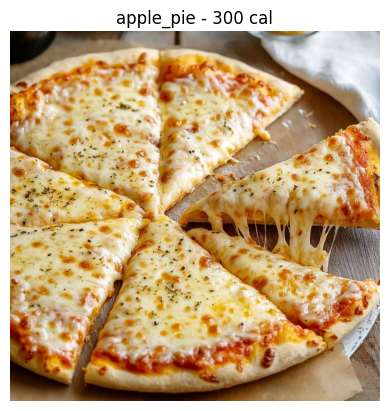

In [14]:
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()  # Upload any food image

for fn in uploaded.keys():
    img = cv2.imread(fn)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_flat = img.flatten()
    img_scaled = scaler.transform([img_flat])

    pred_idx = svm_model.predict(img_scaled)[0]
    food_name = categories[pred_idx]
    calorie = food_calories.get(food_name, "Unknown")

    print(f"Predicted Food: {food_name}")
    print(f"Estimated Calories: {calorie}")

    plt.imshow(cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB))
    plt.title(f"{food_name} - {calorie} cal")
    plt.axis('off')
    plt.show()


In [15]:
import joblib

joblib.dump(svm_model, 'Task5_Food_SVM_Model.pkl')
joblib.dump(scaler, 'Task5_Food_Scaler.pkl')
print("✅ Model and scaler saved!")


✅ Model and scaler saved!
